#Processamento de Dados

##Importação das Bibliotecas

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

In [ ]:
!pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


##Abertura do Arquivo

In [ ]:
dataset_all = pd.read_csv('Bloco-DadosPOCv2.csv', encoding = 'utf-8')

In [ ]:
dataset_all.head

<bound method NDFrame.head of      Ano        Mês  Dias do mês  Demanda máxima (kW)  \
0   2010    Janeiro           31               3087.4   
1   2010  Fevereiro           28               3191.0   
2   2010      Março           31               3916.8   
3   2010      Abril           30               3732.5   
4   2010       Maio           31               3237.1   
5   2010      Junho           30               2603.5   
6   2010      Julho           31               2499.8   
7   2010     Agosto           31               3156.5   
8   2010   Setembro           30               3098.9   
9   2010    Outubro           31               3018.2   
10  2010   Novembro           30               2764.8   
11  2010   Dezembro           31               3467.5   
12  2011    Janeiro           31               2741.8   
13  2011  Fevereiro           28               3582.7   
14  2011      Março           31               3559.7   
15  2011      Abril           30               3721.0   
1

##Dados de Consumo e Demanda a Serem Utilizados

In [ ]:
dataset_consume_demand = dataset_all.iloc[:,3:7]

In [ ]:
dataset_consume_demand.head()

,Demanda máxima (kW),Demanda Contratada (kW),Consumo Ponta (kWh),Consumo Fora de Ponta (kWh)
0,3087.4,3800.0,61433.300,874408.300
1,3191.0,3800.0,63043.200,832833.025
2,3916.8,3800.0,97689.650,1145070.825
3,3732.5,3800.0,84809.875,784432.125
4,3237.1,3800.0,74067.725,908939.525


In [ ]:
len(dataset_consume_demand)

48

##Dados de Treinamento - Consumo Ponta

In [ ]:
highprice_consume_training_set = dataset_consume_demand.iloc[:42,2:3].values

In [ ]:
highprice_consume_training_set

array([[ 61433.3  ],
       [ 63043.2  ],
       [ 97689.65 ],
       [ 84809.875],
       [ 74067.725],
       [ 41276.05 ],
       [ 29482.575],
       [ 47900.075],
       [ 62565.25 ],
       [ 61263.375],
       [  8593.85 ],
       [101203.05 ],
       [ 94446.6  ],
       [101139.625],
       [131702.325],
       [131368.275],
       [110574.525],
       [102553.8  ],
       [ 86218.6  ],
       [116285.65 ],
       [114013.725],
       [117193.   ],
       [116550.75 ],
       [ 91621.175],
       [ 49078.1  ],
       [ 62600.   ],
       [ 95227.25 ],
       [ 78413.65 ],
       [ 75548.075],
       [ 44936.875],
       [ 14394.05 ],
       [ 63129.65 ],
       [ 78664.325],
       [ 71539.4  ],
       [ 58680.475],
       [ 65410.725],
       [ 82898.   ],
       [ 82095.   ],
       [105844.   ],
       [157722.   ],
       [131371.   ],
       [121908.   ]])

##Gráfico da Série Temporal - Consumo Ponta

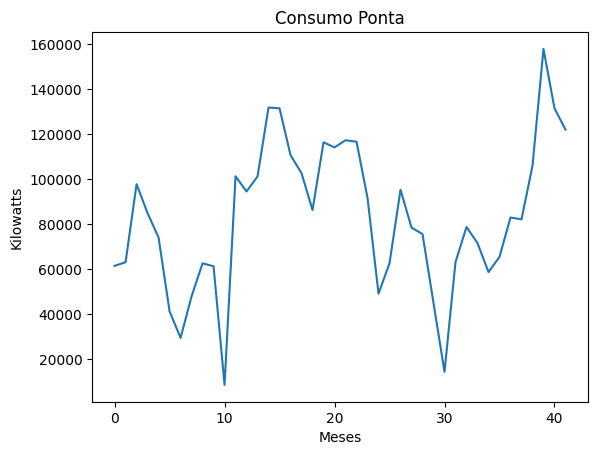

In [ ]:
plt.plot(highprice_consume_training_set)
plt.xlabel("Meses")
plt.ylabel("Kilowatts")
plt.title("Consumo Ponta")
plt.show()

##Normalização - Consumo Ponta

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
highprice_consume_training_set_scaled = sc.fit_transform(highprice_consume_training_set)

##Criação da Estrutura de Dados - Consumo Ponta

In [ ]:
window = 10
trainSize = len(highprice_consume_training_set_scaled)
horizon = 10
highprice_consume_X_train = []
highprice_consume_y_train = []
for i in range(window, trainSize-horizon):
    highprice_consume_X_train.append(highprice_consume_training_set_scaled[i-window:i, 0])
    highprice_consume_y_train.append(highprice_consume_training_set_scaled[i:i+window, 0])
highprice_consume_X_train, highprice_consume_y_train = np.array(highprice_consume_X_train), np.array(highprice_consume_y_train)

##Reshaping - Consumo Ponta

In [ ]:
highprice_consume_X_train.shape

(22, 10)

In [ ]:
highprice_consume_y_train.shape

(22, 10)

In [ ]:
highprice_consume_X_train = np.reshape(highprice_consume_X_train, (highprice_consume_X_train.shape[0], highprice_consume_X_train.shape[1], 1))

In [ ]:
highprice_consume_X_train.shape

(22, 10, 1)

In [ ]:
highprice_consume_y_train = np.reshape(highprice_consume_y_train, (highprice_consume_y_train.shape[0], highprice_consume_y_train.shape[1], 1))

In [ ]:
highprice_consume_y_train.shape

(22, 10, 1)

#Construção da RNN - Consumo Ponta

##Importação das Bibliotecas

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

##Construção da Rede Completa

In [ ]:
# Inicializar a RNN
regressor = Sequential()

# Adicionar a primeira camada LSTM e Dropout 
regressor.add(LSTM(units = 100, return_sequences = True, input_shape = (highprice_consume_X_train.shape[1], 1)))
#regressor.add(Dropout(0.2))
 
# Adicionar a segunda camada LSTM e Dropout
#regressor.add(LSTM(units = 80, return_sequences = True))
#regressor.add(Dropout(0.2))
 
# Adicionar a terceira camada LSTM e Dropout
regressor.add(LSTM(units = 20))
regressor.add(Dropout(0.3))
 
# camada de saída
regressor.add(Dense(units = 1))
 
# Compilar a rede
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Visualizar a rede
regressor.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 10, 100)           40800     
                                                                 
 lstm_9 (LSTM)               (None, 20)                9680      
                                                                 
 dropout_4 (Dropout)         (None, 20)                0         
                                                                 
 dense_4 (Dense)             (None, 1)                 21        
                                                                 
Total params: 50,501
Trainable params: 50,501
Non-trainable params: 0
_________________________________________________________________


##Treinamento

In [ ]:
regressor.fit(highprice_consume_X_train, highprice_consume_y_train, epochs = 200, batch_size = 7)

Epoch 1/200
4/4 [==============================] - 5s 14ms/step - loss: 0.2437
Epoch 2/200
4/4 [==============================] - 0s 13ms/step - loss: 0.1135
Epoch 3/200
4/4 [==============================] - 0s 15ms/step - loss: 0.0827
Epoch 4/200
4/4 [==============================] - 0s 13ms/step - loss: 0.0924
Epoch 5/200
4/4 [==============================] - 0s 18ms/step - loss: 0.0788
Epoch 6/200
4/4 [==============================] - 0s 13ms/step - loss: 0.0694
Epoch 7/200
4/4 [==============================] - 0s 14ms/step - loss: 0.0702
Epoch 8/200
4/4 [==============================] - 0s 14ms/step - loss: 0.0718
Epoch 9/200
4/4 [==============================] - 0s 16ms/step - loss: 0.0712
Epoch 10/200
4/4 [==============================] - 0s 14ms/step - loss: 0.0703
Epoch 11/200
4/4 [==============================] - 0s 18ms/step - loss: 0.0538
Epoch 12/200
4/4 [==============================] - 0s 16ms/step - loss: 0.0652
Epoch 13/200
4/4 [==============================]

#Previsão e Análise dos Resultados - Consumo Ponta

##Dados de Teste

In [ ]:
highprice_consume_test_set = dataset_all.iloc[42:,2:3].values

##Construção da Estrutura para Teste

In [ ]:
highprice_consume_total = pd.concat((dataset_consume_demand.iloc[:42,2:3], dataset_consume_demand.iloc[42:,2:3]), axis = 0)
dcd_testLength = len(dataset_consume_demand.iloc[42:,:])
inputs = highprice_consume_total[len(highprice_consume_total) - dcd_testLength - window:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
highprice_consume_X_test = []
for i in range(window, dcd_testLength + window): 
    highprice_consume_X_test.append(inputs[i-window:i, 0])
highprice_consume_X_test = np.array(highprice_consume_X_test)
highprice_consume_X_test = np.reshape(highprice_consume_X_test, (highprice_consume_X_test.shape[0], highprice_consume_X_test.shape[1], 1))

##Realização das previsões

In [ ]:
predicted_highprice_consume = regressor.predict(highprice_consume_X_test)
predicted_highprice_consume = sc.inverse_transform(predicted_highprice_consume)

1/1 [==============================] - 1s 871ms/step


In [ ]:
df_highprice_consume_training_set = pd.DataFrame(highprice_consume_training_set)

##Visualização dos Resultados de Treino e Teste

1/1 [==============================] - 0s 25ms/step


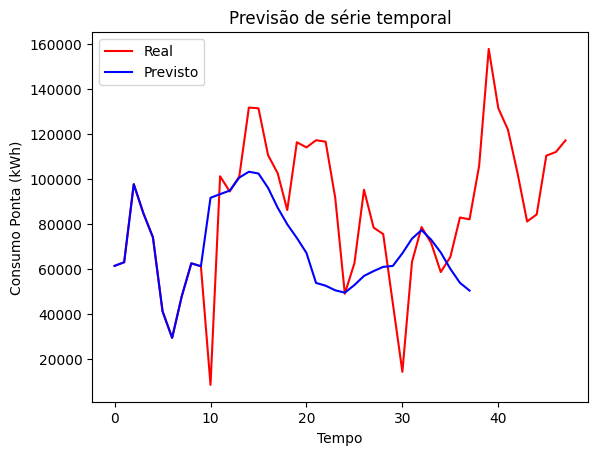

In [ ]:
allTarget_highprice_consume = np.vstack((dataset_consume_demand.iloc[:42,2:3], dataset_consume_demand.iloc[42:,2:3]))
training_predicted_highprice_consume = regressor.predict(highprice_consume_X_train)
training_predicted_highprice_consume = sc.inverse_transform(training_predicted_highprice_consume)
allForecasted_highprice_consume = np.vstack((df_highprice_consume_training_set[0:window], training_predicted_highprice_consume, predicted_highprice_consume))
plt.plot(allTarget_highprice_consume, color = 'red', label = 'Real')
plt.plot(allForecasted_highprice_consume, color = 'blue', label = 'Previsto')
plt.title('Previsão de série temporal')
plt.xlabel('Tempo')
plt.ylabel('Consumo Ponta (kWh)')
plt.legend()
plt.savefig('predictions_training_test.svg')
plt.show()

#Métricas de Avaliação - Consumo Ponta

In [ ]:
import math
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(highprice_consume_test_set, predicted_highprice_consume))
print('RMSE: ', rmse)

RMSE:  64408.77113052292


In [ ]:
mse = mean_squared_error(highprice_consume_test_set, predicted_highprice_consume)
print('MSE: ',mse)

MSE:  4148489798.5440826


In [ ]:
mape = np.mean(np.abs((highprice_consume_test_set - predicted_highprice_consume) / highprice_consume_test_set)) * 100
print('MAPE: ',mape)

MAPE:  207548.78927251344
